In [10]:
import warnings
warnings.filterwarnings("ignore")

# Tabular data friends:
import pandas as pd
import numpy as np

# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Data acquisition
from pydataset import data

import prepare as prep
import modeling as mod

1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [11]:
train, validate, test = prep.get_prep_split_titanic()

In [12]:
train
col= ["passenger_id", "sex", "survived", "embarked"]

In [13]:
x_train, y_train, x_validate, y_validate, x_test, y_test = mod.create_x_y(train, validate, test, "survived", col )

In [14]:
x_train

,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1
...,...,...,...,...,...,...,...,...
695,2,0,0,13.5000,1,1,0,1
128,3,1,1,22.3583,0,0,0,0
636,3,0,0,7.9250,1,1,0,1
222,3,0,0,8.0500,1,1,0,1


In [15]:
knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn5.fit(x_train, y_train)

KNeighborsClassifier()

In [16]:
y_pred5 = knn5.predict(x_train)
y_pred_proba5 = knn5.predict_proba(x_train)
# y_pred_proba5 = knn5.predict_proba(x_train)

In [17]:
y_pred_proba5[:5]


array([[0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [1. , 0. ]])

2. Evaluate your results using the model score, confusion matrix, and classification report.

In [18]:
confusion_matrix(y_train, y_pred5)

array([[280,  49],
       [ 50, 155]])

In [19]:
pd.crosstab(y_train, y_pred5)

col_0,0,1
survived,,
0,280,49
1,50,155


In [20]:
print(classification_report(y_train, y_pred5))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       329
           1       0.76      0.76      0.76       205

    accuracy                           0.81       534
   macro avg       0.80      0.80      0.80       534
weighted avg       0.81      0.81      0.81       534



In [21]:
def knn_model_accuracies(x_train, y_train, x_validate, y_validate):
    '''
    This function is an aid for KNN models.
    Takes arguments x_train, y_train, x_validate, y_validate, which iterates through 10 n_neighbors and fits 
    and then produces a dataframe that shows the train score, validation score and their differences
    '''
    model_accuracies = {}

    for i in range(1,21):
        #MAKE THE THING
        knn = KNeighborsClassifier(n_neighbors=i)

        #FIT THE THING
        knn.fit(x_train, y_train)

        #USE THE THING
        model_accuracies[f'{i}_neighbors'] = {
            'train_score': round(knn.score(x_train, y_train),2),
            'validate_score':round(knn.score(x_validate, y_validate),2),
            'diff_score': round(round(knn.score(x_train, y_train),2) - round(knn.score(x_validate, y_validate),2), 2)
        }
    return pd.DataFrame(model_accuracies).T


In [22]:
knn_model_accuracies(x_train, y_train, x_validate, y_validate)

,train_score,validate_score,diff_score
1_neighbors,0.93,0.69,0.24
2_neighbors,0.86,0.72,0.14
3_neighbors,0.85,0.73,0.12
4_neighbors,0.82,0.74,0.08
5_neighbors,0.81,0.73,0.08
6_neighbors,0.80,0.72,0.08
7_neighbors,0.79,0.72,0.07
8_neighbors,0.79,0.73,0.06
9_neighbors,0.79,0.73,0.06
10_neighbors,0.78,0.71,0.07


In [39]:
knn4 = KNeighborsClassifier(n_neighbors=4)

In [40]:
knn4.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4. Run through steps 1-3 setting k to 10

5. Run through steps 1-3 setting k to 20

In [32]:
print(f"""Accuracy of KNN (k=8) classifier on validate set: {knn8.score(x_validate, y_validate):.2f}
     
Accuracy of KNN (k=5) classifier on validate set: {knn5.score(x_validate, y_validate):.2f}""")

Accuracy of KNN (k=8) classifier on validate set: 0.73
     
Accuracy of KNN (k=5) classifier on validate set: 0.73


In [33]:
print(classification_report(y_train, y_pred5))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       329
           1       0.76      0.76      0.76       205

    accuracy                           0.81       534
   macro avg       0.80      0.80      0.80       534
weighted avg       0.81      0.81      0.81       534



In [27]:
#VIZ
def knn_viz_20(x_train, y_train, x_validate, y_validate):
    '''
    This function helps visualize your knn results by fitting the given arguments (x_train, y_train, x_validate, y_validate)
    and using these features with the KNeighborsClassifier to calculate through an iteration of 20 and find a train score and validation score and producing the vsual plot
    '''
    metrics = []

    for k in range(1,21):

        # MAKE the thing
        knn = KNeighborsClassifier(n_neighbors=k)

        # FIT the thing (remember only fit on training data)
        knn.fit(x_train, y_train)

        # USE the thing (calculate accuracy)
        train_score = knn.score(x_train, y_train)
        validate_score = knn.score(x_validate, y_validate)

        output = {
            "k": k,
            "train_score": train_score,
            "validate_score": validate_score
        }

        metrics.append(output)

    #conver to df
    results = pd.DataFrame(metrics)

    # plot the data
    results.set_index('k').plot(figsize = (16,9))
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(0,21,1))
    plt.grid()

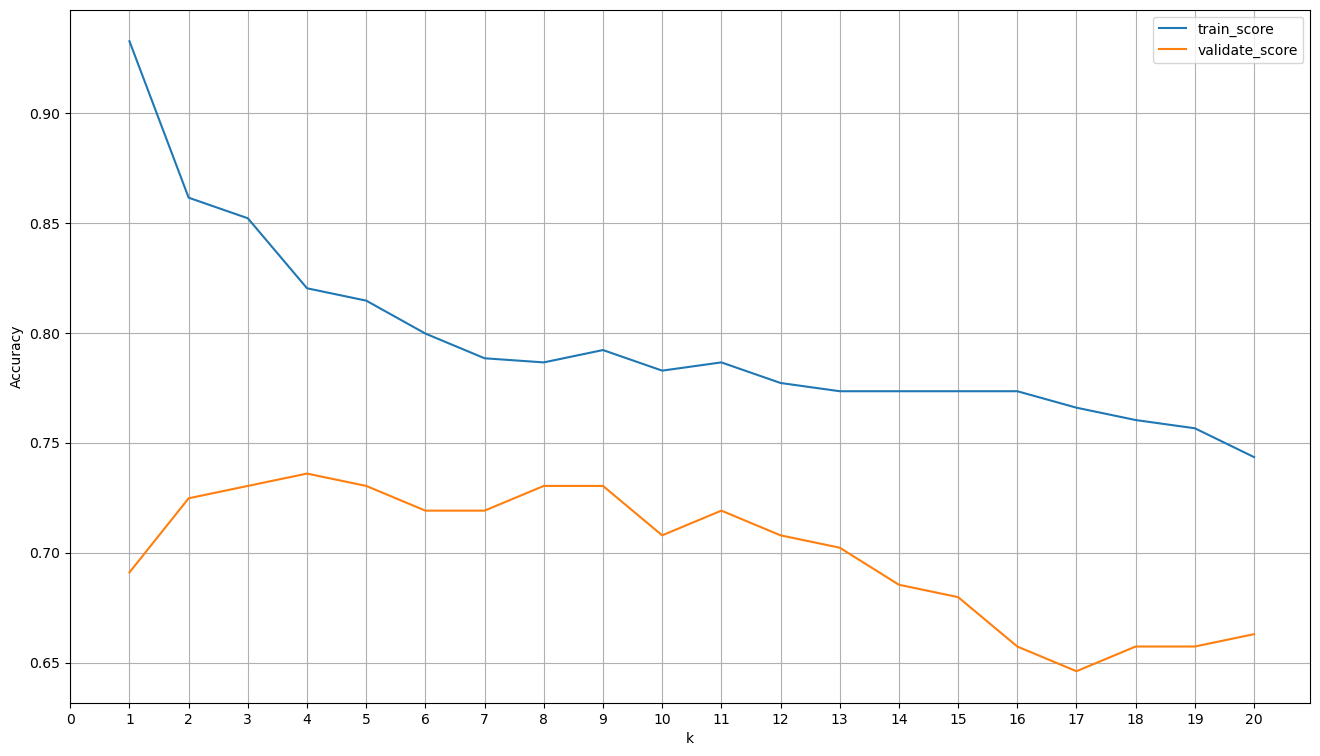

In [28]:
mod.knn_viz_20(x_train, y_train, x_validate, y_validate)

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

The better performing model in n_neighbors=1, it has the best fit without losing a lot of accuracy1

7. Which model performs best on our out-of-sample data from validate?

n_neighbor = 8 performs the best 